# 1. Environment Setup

In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# 1.1 Clean Data

In [3]:
# Read in data
df = pd.read_csv('london_weather_data_1979_to_2023.csv')
df.dropna(inplace=True)

# Drop columns that start with 'Q_'
df = df.loc[:, ~df.columns.str.startswith('Q_')]

# Display the first few rows
df.head()

,DATE,TX,TN,TG,SS,SD,RR,QQ,PP,HU,CC
0,19790101,23.0,-75.0,-41.0,70.0,9.0,4.0,52.0,10190.0,83.0,2.0
1,19790102,16.0,-75.0,-26.0,17.0,8.0,0.0,27.0,10253.0,76.0,6.0
2,19790103,13.0,-72.0,-28.0,0.0,4.0,0.0,13.0,10205.0,86.0,5.0
3,19790104,-3.0,-65.0,-26.0,0.0,2.0,0.0,13.0,10084.0,68.0,8.0
4,19790105,56.0,-14.0,-8.0,20.0,1.0,0.0,29.0,10225.0,73.0,6.0


In [4]:
# Initialize variables
X = df.drop(columns=['DATE', 'SD'])
y = df[['SS']]

## 1.2 Standardize Data

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1.3 PCA

In [6]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['score'] = y

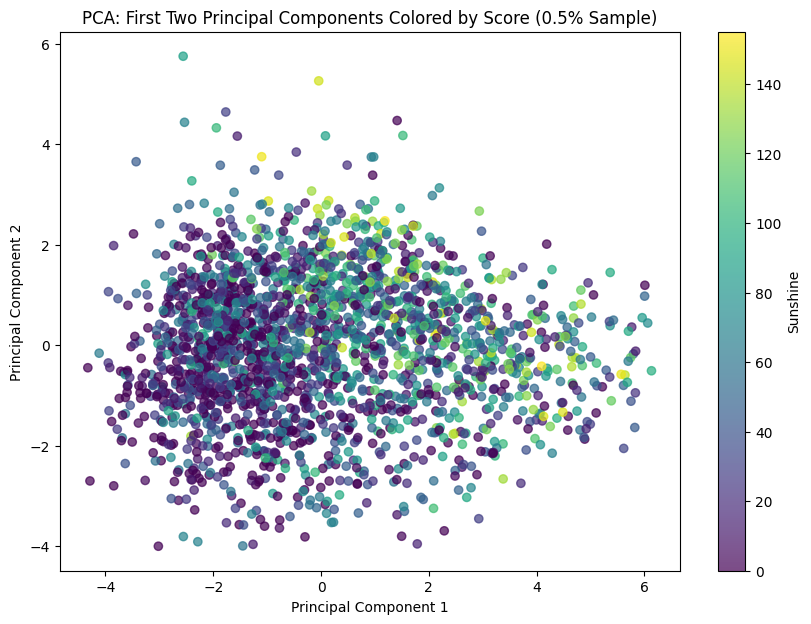

In [7]:
# Sample 15% of the data
sampled_data = pca_df.sample(frac=0.15, random_state=42)  # random_state ensures reproducibility

# Plot the first two principal components using the sampled data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(sampled_data['PC1'], sampled_data['PC2'], 
                      c=sampled_data['score'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Sunshine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by Score (0.5% Sample)')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.15, random_state=42)

## 2. Base Model (Decision Tree)

A Decision Tree is a good base model because of its simplicity, interpretability, and ability to handle both numerical and categorical data. It is a tree-based model that doesn't apply ensemble techniques, which allows us to see the advantages/disadvantages to bagging/boosting later on.

Decision Tree R² Score: 0.76


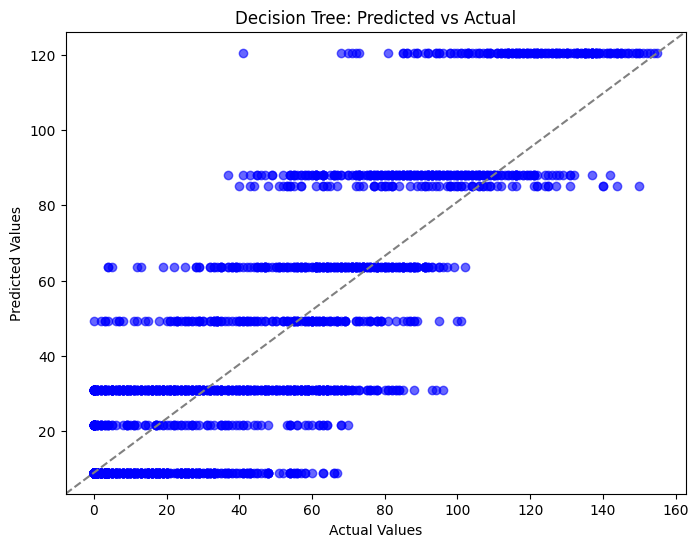

In [9]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate and Display R² Score
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree R² Score: {r2_dt:.2f}")

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], '--', color='gray', transform=plt.gca().transAxes)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Predicted vs Actual")
plt.show()

# 3. Bagging (Random Forest)
**Bagging (Bootstrap Aggregation)** is an ensemble method that involves:
1. Creating multiple bootstrapped datasets by sampling the training data with replacement.
2. Training a model (e.g., Decision Tree) on each bootstrapped dataset independently.
3. Combining predictions using majority voting (classification) or averaging (regression).

*When to Use Bagging:*
- When models are prone to high variance (e.g., Decision Trees).
- When you need to reduce overfitting and improve generalization.
- Works best for unstable models, like Decision Trees, where small changes in input data can significantly impact results.

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R² Score: 0.86


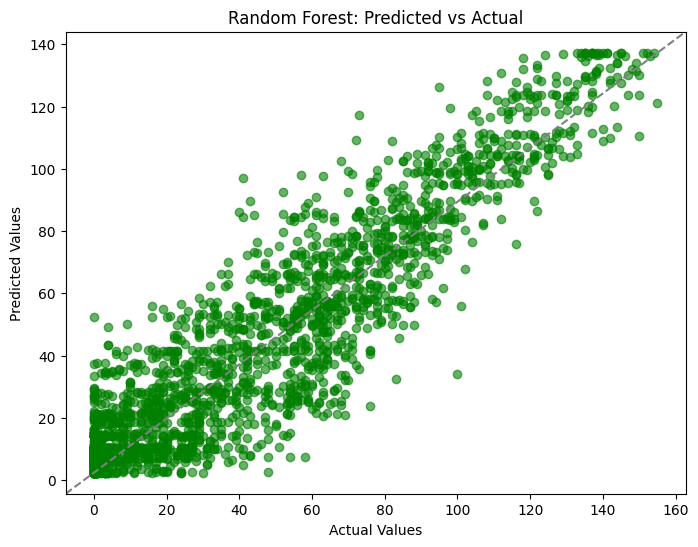

In [10]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate and Display R² Score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf:.2f}")

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([0, 1], [0, 1], '--', color='gray', transform=plt.gca().transAxes)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

# 4. Boosting (Gradient Boosting)
**What is Boosting and Why Use It?**
- Boosting is an iterative ensemble technique that trains models sequentially, with each new model focusing on correcting the errors made by previous models. The weights of misclassified samples are increased so that subsequent models pay more attention to these errors.

*Why Use Boosting:*
- Boosting reduces both bias and variance.
- It is well-suited for complex relationships in data and often achieves higher accuracy.
- Popular boosting algorithms include Gradient Boosting, AdaBoost, and XGBoost.
- However, Boosting can be sensitive to noisy data and may overfit if not properly regularized

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting R² Score: 0.87


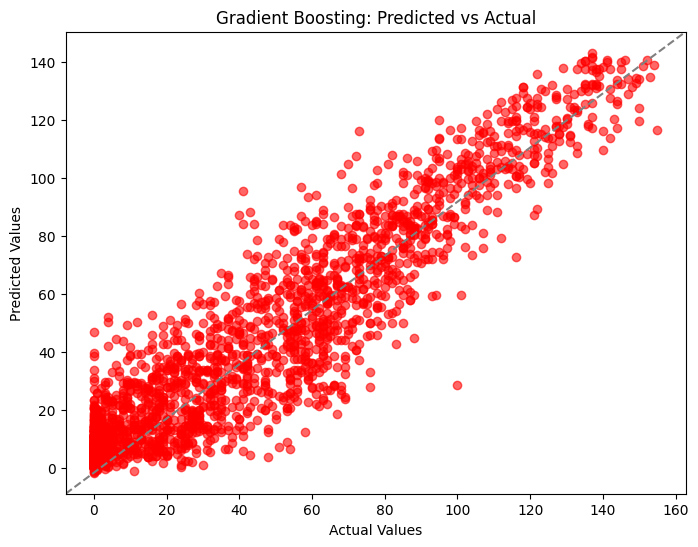

In [11]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate and Display R² Score
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting R² Score: {r2_gb:.2f}")

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='red', alpha=0.6)
plt.plot([0, 1], [0, 1], '--', color='gray', transform=plt.gca().transAxes)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting: Predicted vs Actual")
plt.show()


# 5. Comparisons

In [12]:
# Print Model R² Scores
print("Model R² Score Summary:")
print(f"Decision Tree R² Score: {r2_dt:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")
print(f"Gradient Boosting R² Score: {r2_gb:.2f}")

# Plot Model Comparisons
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
r2_scores = [r2_dt, r2_rf, r2_gb]


Model R² Score Summary:
Decision Tree R² Score: 0.76
Random Forest R² Score: 0.86
Gradient Boosting R² Score: 0.87


# 6. Optimization

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

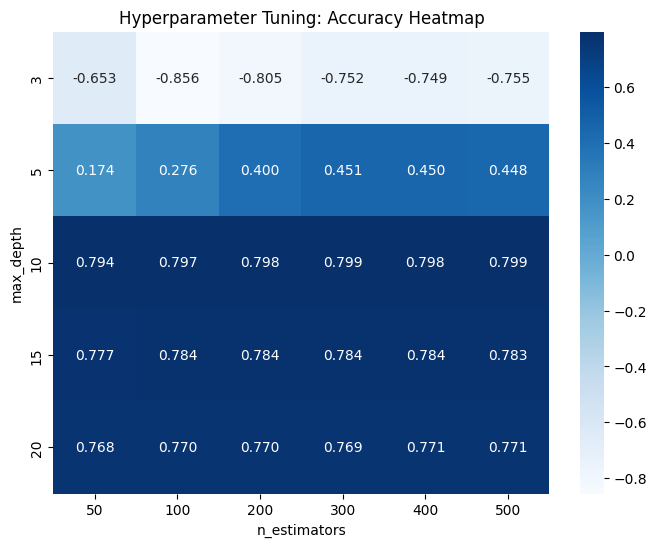

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 15, 20]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Extract results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Create pivot table for heatmap
pivot_table = cv_results.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".3f")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Hyperparameter Tuning: Accuracy Heatmap")
plt.show()
